# Time series plot of COVID-19 cummulative confirmed cases by country

Hiroshi Maruyama (Twitter: @maruyama)

## Log plot of confirmes cases

Data source: Johns Hopkins University Center for Systems Science and Engineering


last_date = 3/19/20


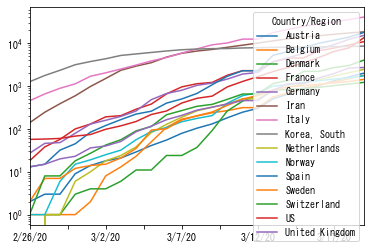

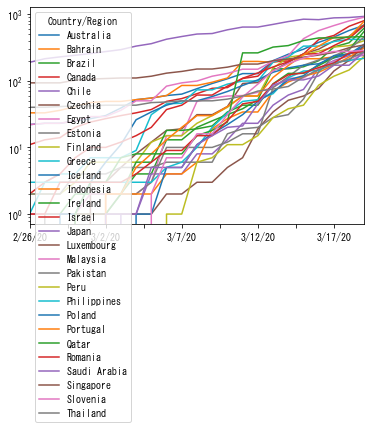

In [41]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df = df.drop(columns=["Lat", "Long"])

last_date = df.columns[-1]
print("last_date =", last_date)

country_df = df.groupby("Country/Region").sum()
# display(country_df)

country_df = country_df.drop(["China", "Cruise Ship"])

t = country_df[(country_df[last_date] > 1000) ].T    # Countries with cummulative confirmed cases > 1000

t[35:].plot(logy=True)

# Slect countries with cummulative cofirmed cases between 200 and 1000
t = country_df[(country_df[last_date] > 200) & (country_df[last_date] < 1000) ].T  
t[35:].plot(logy=True)


## Daily reproduction rate by country

Country/Region,Japan,France,Germany,"Korea, South",US,United Kingdom
2/24/20,1.148337,1.000000,1.000000,1.598349,1.503695,1.130404
2/25/20,1.116940,1.052727,1.020414,1.311602,1.503695,1.130404
2/26/20,1.087380,1.144714,1.190551,1.279498,1.560491,1.130404
2/27/20,1.104093,1.468478,1.421933,1.284641,1.043805,1.048856
2/28/20,1.102796,1.596794,1.413397,1.337380,1.055667,1.154416
2/29/20,1.084389,1.771098,1.430280,1.356850,1.060583,1.209469
3/1/20,1.061554,1.506792,1.413823,1.283725,1.084596,1.338866
3/2/20,1.063176,1.496418,1.490683,1.228693,1.177674,1.259921
3/3/20,1.067293,1.268265,1.353764,1.180794,1.201686,1.304010
3/4/20,1.089422,1.303616,1.263143,1.145871,1.262752,1.336797


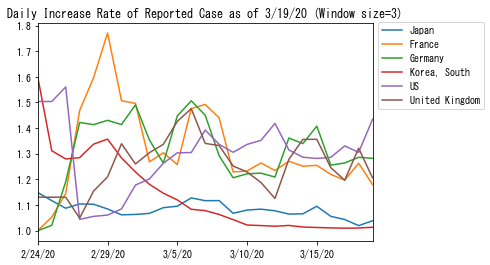

In [42]:
# 日次再生算数R（３日間の移動平均）をプロット
# Daily reproduction rate (moving average of windows size = 3)
countries = ("Japan", "France", "Germany", "Korea, South", "US", "United Kingdom")
# countries = ("Japan", "France", "Germany", "US", "Singapore", "United Kingdom", "Spain", "Switzerland")
window = 3
daily_r = country_df[country_df[last_date] > 300].T.pct_change() + 1.0
# daily_r.iloc[30:].loc[:, countries].rolling(window).mean().iloc[window:].plot(title="Daily Reproduction Rate by Country (Window size={})".format(window))

data_to_plot = np.exp(np.log(daily_r.iloc[30:].loc[:, countries]).rolling(window).mean().iloc[window:])
title = "Daily Increase Rate of Reported Case as of {} (Window size={})".format(last_date, window)
data_to_plot.plot(title=title).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
data_to_plot

## Japanese daily increase rate of confirmed cases by prefecture

Data source: Toyo Keizai Online

len= 789


<Figure size 432x288 with 0 Axes>

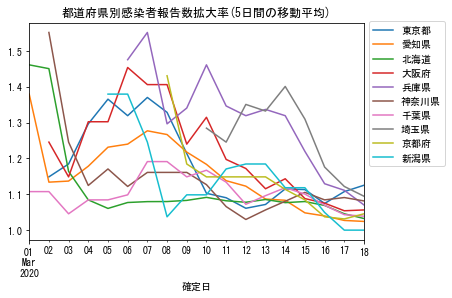

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)


df = pd.read_csv('https://raw.githubusercontent.com/kaz-ogiwara/covid19/master/data/individuals.csv', parse_dates=[["確定年", "確定月", "確定日"]])
print("len=", len(df))
# display(df)
# print(df.columns)
df = df.drop(['新No.', '旧No.', '年代', '性別', '居住地2'], axis=1)

# df.groupby("居住地").count()
#df.groupby(["確定年", "確定月", "確定日"]).count()
def get_data_by_pref(pref):  # 県ごとのデータを取得
    ts = df[df["居住地1"] == pref].groupby("確定年_確定月_確定日").count()
    ts.reset_index(inplace = True)
    # ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地":"愛知県" })
    ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地1" : pref})
    # ts = ts.set_index("確定日")
    return ts

fig = plt.figure()
window = 5
pref_data = get_data_by_pref("東京都")

for pref in ("愛知県", "北海道", "大阪府", "兵庫県", "神奈川県","千葉県","埼玉県","京都府","新潟県"):
    pref_data = pref_data.merge(get_data_by_pref(pref), how='outer', sort=True)
    # print(pref_data.describe())
# get_data_by_pref("東京都")
pref_data = pref_data.set_index("確定日")
title = "都道府県別感染者報告数拡大率({}日間の移動平均)".format(window)

data_to_plot = np.exp(np.log(pref_data.loc["2020-02-25":,:].fillna(0).cumsum().pct_change() + 1.0).rolling(window).mean()).iloc[window:, :]
data_to_plot.plot(title=title).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

# pref_data

## Projection of confirmed cases by different reproduction rates

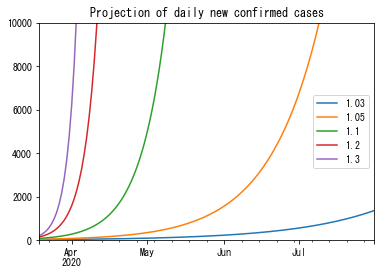

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import numpy as np

start_date = "2020/03/19"
end_date = "2020/07/31"
I0 = 889
reproduction_rates = np.array([1.03, 1.05, 1.1, 1.2, 1.3])

dates = pd.date_range(start_date, end_date)
c = np.zeros((len(dates), len(reproduction_rates)))
for i in range(len(reproduction_rates)):
    c[:,i] = reproduction_rates[i] ** (np.arange(len(dates)) - 1) * I0 * (reproduction_rates[i] - 1)


sim = pd.DataFrame(c, index=dates, columns=reproduction_rates)
sim.plot(ylim=[0, 10000], title="Projection of daily new confirmed cases")
